#Importação e Download de Bibliotecas

In [1]:
 !pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 5.2 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=0d09b9280a77dee82511cb1997d254d3449d6f56fa3209f65414a94db0ed6ffa
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import cont2discrete, lti, dlti, dstep

##Planta

G_s= 
      3
-------------
s^2 + 3 s + 2



(-4.0, 0.0)

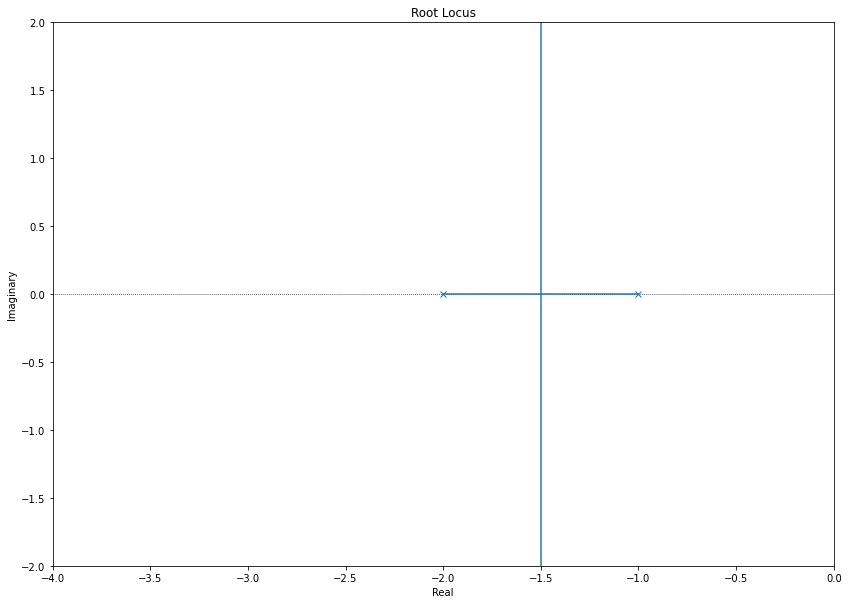

In [3]:
s = ctl.TransferFunction.s
G_s = (3)/(s**2 +3*s+2)
print('G_s=',G_s);
plt.figure(figsize=(14,10))
plt.figure(1);
ctl.root_locus(G_s,grid=False)
plt.ylim([-2,2])
plt.xlim([-4,0])

/usr/local/lib/python3.7/dist-packages/control/pzmap.py:94: FutureWarning: 'Plot' keyword is deprecated in pzmap; use 'plot'
  FutureWarning)


(array([-2.+0.j, -1.+0.j]), array([], dtype=complex128))

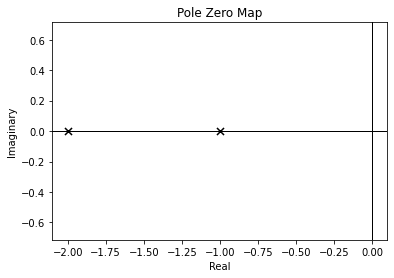

In [4]:
ctl.pzmap(G_s, Plot=True, title='Pole Zero Map')

##Controle PID

###Parametros de entrada

In [5]:
mp = math.log(4.6/100)
tss = 2.8571
EWn = 4/tss 

In [6]:
print(mp)
Qsi = math.sqrt((mp**2)/((math.pi**2)+(mp**2)))
print("Qsi  = ",Qsi)
Beta = math.degrees(math.acos(Qsi))
print("Beta = ",Beta)
Wn = 4/(Qsi*tss)
print("Wn = ",Wn)
ponto0 = np.array([-Qsi*Wn,+(Wn*math.sqrt(1-Qsi**2))])
print("Ponto0 = ",ponto0)
ponto1 = np.array([-Qsi*Wn,-(Wn*math.sqrt(1-Qsi**2))])
print("Ponto1 = ",ponto1)


-3.079113882493042
Qsi  =  0.6999695246406082
Beta =  45.575440990379015
Wn =  2.000117078002546
Ponto0 =  [-1.400021    1.42842904]
Ponto1 =  [-1.400021   -1.42842904]


###Criterio de Angulo

In [7]:
#https://www.geogebra.org/calculator/arqckg9s
P0 = np.array([ 0,0])
P1 = np.array([-1,0])
P2 = np.array([-2,0])
Z0 = np.array([-2,0])

TETA0 = 180 + math.degrees(math.atan( (ponto0[1]-P0[1]) / (ponto0[0]-P0[0]) ))
TETA1 = 180 + math.degrees(math.atan( (ponto0[1]-P1[1]) / (ponto0[0]-P1[0]) ))

Fi = TETA0 + TETA1 - 180

Z1 = np.array([((-ponto0[1])/math.tan((Fi*math.pi/180)))+ponto0[0],0])
print("Fi=", Fi)
print("z2=", Z1)

Fi= 60.06906945842604
z2= [-2.22243055  0.        ]


###Criterio de Modulo

In [8]:
Kc = (np.linalg.norm(ponto0 - P0)) * (np.linalg.norm(ponto0 - P1))/(np.linalg.norm(ponto0 - Z1))/3
Kc

0.6000140002100032

###Definição de valores para o PID

In [9]:
kp = 2.534;
kd = 0.6/kp;
ki = 2.668/kp;

C_s = (kp*(1 + (ki/s) + kd*s))

print('C_s= ',C_s);

C_s=  
0.6 s^2 + 2.534 s + 2.668
-------------------------
            s



/usr/local/lib/python3.7/dist-packages/control/pzmap.py:94: FutureWarning: 'Plot' keyword is deprecated in pzmap; use 'plot'
  FutureWarning)


(array([0.+0.j]), array([-2.22333333+0.j, -2.        +0.j]))

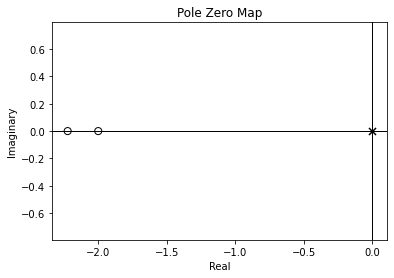

In [10]:
ctl.pzmap(C_s, Plot=True, title='Pole Zero Map')

##Planta + Controle PID

In [11]:
print(G_s)
print(C_s)
print(C_s*G_s)
GC_s = ctl.series(C_s,G_s)
GC_s


      3
-------------
s^2 + 3 s + 2


0.6 s^2 + 2.534 s + 2.668
-------------------------
            s


1.8 s^2 + 7.602 s + 8.004
-------------------------
    s^3 + 3 s^2 + 2 s



TransferFunction(array([1.8  , 7.602, 8.004]), array([1, 3, 2, 0]))

(array([[-2.00000000e+00+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -9.50353399e-01+0.00000000e+00j,
         -8.67106696e-02+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -8.88669323e-01+0.00000000e+00j,
         -1.85458815e-01+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -8.03526922e-01+0.00000000e+00j,
         -3.07665284e-01+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -7.74793494e-01+0.00000000e+00j,
         -3.45664730e-01+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -7.39930640e-01+0.00000000e+00j,
         -3.89793601e-01+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -6.93200539e-01+0.00000000e+00j,
         -4.45789719e-01+0.00000000e+00j],
        [-2.00000000e+00+0.00000000e+00j, -5.74128138e-01-2.44986218e-09j,
         -5.74128138e-01+2.44986218e-09j],
        [-2.00000000e+00+0.00000000e+00j, -5.82597219e-0

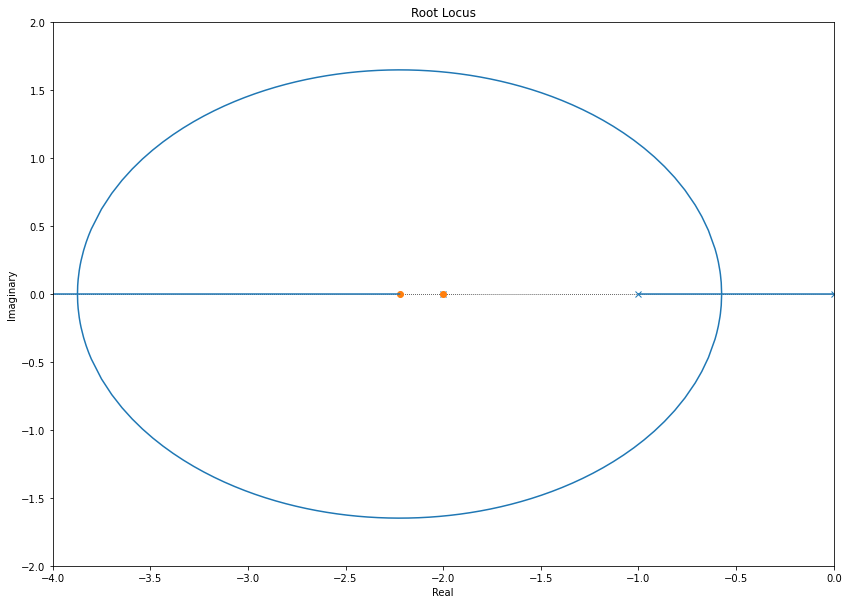

In [12]:
plt.figure(figsize=(14,10))

ctl.root_locus(GC_s,ylim=[-2,2],xlim=[-4,0],grid=False)


/usr/local/lib/python3.7/dist-packages/control/pzmap.py:94: FutureWarning: 'Plot' keyword is deprecated in pzmap; use 'plot'
  FutureWarning)


(array([-2.+0.j, -1.+0.j,  0.+0.j]), array([-2.22333333+0.j, -2.        +0.j]))

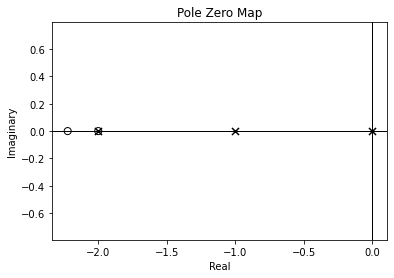

In [13]:
ctl.pzmap(GC_s, Plot=True, title='Pole Zero Map')

##Discretização do controlador

###Tustin

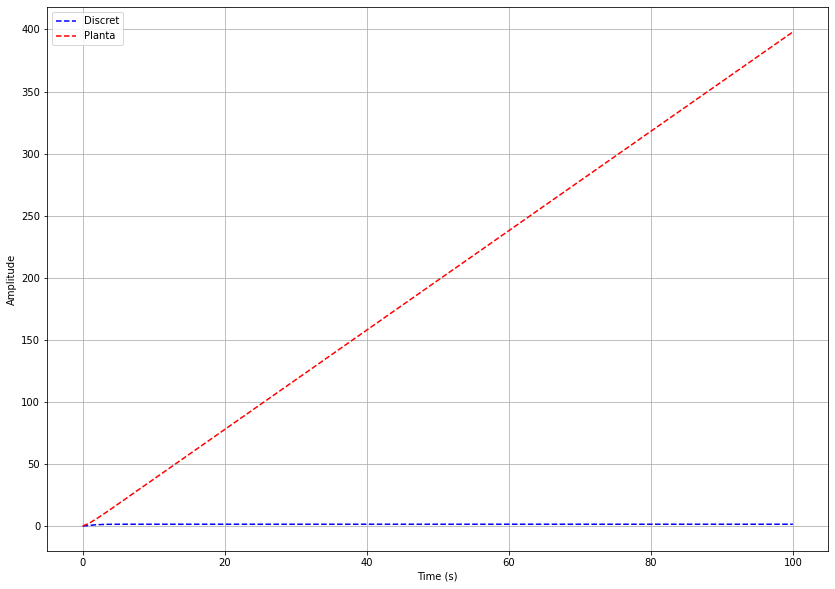

In [16]:
Ts = 0.1

num = [kp+(ki*Ts/2)+((2*kd)/Ts)*(ki*Ts)-(4*(kd/Ts))-kp+(ki*Ts/2)+((2*kd)/Ts)];
den = [1, 0, -1];
C_z = ctl.tf(num,den,Ts);

t = np.linspace(0, 100, 100)
#Cs_s = ctl.ss(C_s)
t1, y1 = ctl.step_response(G_s, t)
t2, y2 = ctl.step_response(GC_s, t)
#t2, y2 = ctl.impulse_response(C_z, t)
#t3, y3 = ctl.impulse_response(C_z, t)

fig = plt.figure(figsize= (14,10))

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

#plt.plot(t3,y3,"y")
plt.plot(t1,y1,"b--")
plt.plot(t2,y2,"r--")


plt.legend(["Discret","Planta", "Control + Planta"])

plt.grid()

###MT1

In [ ]:
Wd = Wn*((1-Qsi**2)**(1/2))
Ws = Wd*10

Ts = 2*(math.pi)*Ws
print(Ts)
z = ctl.TransferFunction.z

num = [kp+(ki*Ts/2)+((2*kd)/Ts)*(ki*Ts)-(4*(kd/Ts))-kp+(ki*Ts/2)+((2*kd)/Ts)];
den = [1, 0, -1];
C_z = ctl.tf(num,den,Ts);

t = np.linspace(0, 100, 1000)
#Cs_s = ctl.ss(C_s)
t1, y1 = ctl.step_response(G_s, t)
t2, y2 = ctl.step_response(GC_s, t)
t3, y3 = ctl.step_response(C_z, Ts)
#t2, y2 = ctl.impulse_response(C_z, t)
#t3, y3 = ctl.impulse_response(C_z, t)

fig = plt.figure(figsize= (14,10))

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

#plt.plot(t3,y3,"y")
plt.plot(t1,y1,"b--")
plt.plot(t2,y2,"r--")


plt.legend(["Discret","Planta", "Control + Planta"])

plt.grid()

###MT2

In [ ]:
TimeStep = 0.02

z = ctl.TransferFunction.z

Ss = ((2z-2)/((z+1)*TimeStep))
C_z = (0.6*Ss**2 + 2.534*Ss + 2.668)/Ss
print(C_z)
    # 0.6 s^2 + 2.534 s + 2.668

#((3*Ss**2) + (12.67*Ss) + (12.34))/(Ss**3 + 3*Ss**2 + 2*Ss)]
plt.figure(figsize=(14,10))
plt.figure(1);
ctl.root_locus(C_z,grid=False)

In [ ]:
Wd = Wn*((1-Qsi**2)**(1/2))
Ws = Wd*10

TimeStep = 2*(math.pi)*Ws
z = ctl.TransferFunction.z

Ss = ((z-1)/(z+1))*2/TimeStep

C_z = (0.6*Ss**2 + 2.534*Ss + 2.668)/Ss

t = np.linspace(0, 10, 1000)
#Cs_s = ctl.ss(C_s)
t1, y1 = ctl.step_response(G_s, t)
t2, y2 = ctl.step_response(GC_s, t)
t3, y3 = ctl.step_response(C_z, t)
#t2, y2 = ctl.impulse_response(C_z, t)
#t3, y3 = ctl.impulse_response(C_z, t)

fig = plt.figure(figsize= (14,10))

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.plot(t3,y3,"y")
plt.plot(t1,y1,"b--")
plt.plot(t2,y2,"r--")


plt.legend(["Planta", "Control + Planta","discret"])
#plt.plot(t2,y2)
plt.grid()

###MT3
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html

In [ ]:

Wd = Wn*((1-Qsi**2)**(1/2))
Ws = Wd*10

Ts = 2*(math.pi)*Ws
z = ctl.TransferFunction.z

num = [kp+(ki*Ts/2)+((2*kd)/Ts)*(ki*Ts)-(4*(kd/Ts))-kp+(ki*Ts/2)+((2*kd)/Ts)];
den = [1, 0, -1];
C_z = ctl.tf(num,den,Ts);

t = np.linspace(0, 100, 1000)
#Cs_s = ctl.ss(C_s)
t1, y1 = ctl.step_response(G_s, t)
t2, y2 = ctl.step_response(GC_s, t)
t3, y3 = ctl.step_response(C_z, Ts)
#t2, y2 = ctl.impulse_response(C_z, t)
#t3, y3 = ctl.impulse_response(C_z, t)

d_system = cont2discrete([num,den], Ts, method='bilinear', alpha=None)
s, x_d = dstep(d_system)


fig = plt.figure(figsize= (14,10))

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.plot(x_d, s, "y")
#plt.plot(t1,y1,"b--")
#plt.plot(t2,y2,"r--")


#plt.legend(["Discret","Planta", "Control + Planta"])

plt.grid()

## Tustin MATLAB

- Este é o codigo da descritização pelo metodo Tustin no matlab

```
function [u,I,D] = fcn(e,eant, Iant, Dant)

T = 0.1;
Kp = 2.534;
Kd = 0.6/Kp;
Ki = 2.668/Kp;

P = Kp*e;
I = (Iant + ((Ki*T)/2)*(e + eant));
D = (-Dant + ((2*Kd)/T)*(e - eant));



u=P+I+D;
```

